# 2020년 장애인의 각 역마다의 하차인원과 순위

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #시각화 추가 기능(색, 화면 나눔)

from matplotlib import font_manager, rc # 한글 처리
f_path = 'C:/Windows/Fonts/malgun.ttf'
font_name=font_manager.FontProperties(fname=f_path).get_name()
rc('font', family = font_name)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
df = pd.read_csv('../Project3 Data/B1.csv')
df

,호선,역번호,역명,구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,1,150,서울역,승차,47463.0,35637.0,30467.0,33290.0,36989.0,36283.0,37620.0,33193.0,31074.0,36224.0,35634.0,30668.0
1,1,150,서울역,하차,44022.0,33305.0,27909.0,30762.0,34377.0,33805.0,34928.0,30773.0,29014.0,33547.0,33058.0,28136.0
2,1,151,시청,승차,18060.0,13989.0,10710.0,10790.0,11791.0,11877.0,13475.0,11411.0,9948.0,11600.0,11959.0,10279.0
3,1,151,시청,하차,17741.0,13488.0,10441.0,10388.0,11213.0,11364.0,12910.0,10591.0,9169.0,10721.0,10954.0,9528.0
4,1,152,종각,승차,27936.0,22166.0,18213.0,19824.0,22019.0,22213.0,23958.0,19927.0,17864.0,20711.0,20808.0,17488.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,8,2825,신흥,하차,9095.0,7443.0,5958.0,6238.0,7144.0,6851.0,6931.0,6189.0,5973.0,6570.0,6719.0,6201.0
556,8,2826,수진,승차,9523.0,7280.0,5517.0,5928.0,6889.0,6439.0,7151.0,6187.0,5971.0,6735.0,6825.0,6044.0
557,8,2826,수진,하차,8908.0,6832.0,5143.0,5548.0,6262.0,6112.0,6823.0,5731.0,5700.0,6374.0,6498.0,5605.0
558,8,2827,모란,승차,8837.0,6867.0,5988.0,6820.0,7554.0,7209.0,7733.0,6714.0,6780.0,7708.0,7173.0,6430.0


In [4]:
df.info() #이 데이터를 통해 결측값이 존재함을 확인함.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   호선      560 non-null    int64  
 1   역번호     560 non-null    int64  
 2   역명      560 non-null    object 
 3   구분      560 non-null    object 
 4   1월      550 non-null    float64
 5   2월      550 non-null    float64
 6   3월      550 non-null    float64
 7   4월      550 non-null    float64
 8   5월      550 non-null    float64
 9   6월      550 non-null    float64
 10  7월      550 non-null    float64
 11  8월      554 non-null    float64
 12  9월      554 non-null    float64
 13  10월     554 non-null    float64
 14  11월     554 non-null    float64
 15  12월     554 non-null    float64
dtypes: float64(12), int64(2), object(2)
memory usage: 70.1+ KB


In [5]:
df.describe()

,호선,역번호,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
count,560.000000,560.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,554.000000,554.000000,554.000000,554.000000,554.000000
mean,4.671429,1640.492857,12525.545455,10209.783636,8735.472727,9342.569091,10337.892727,10325.292727,10853.770909,9223.599278,9030.229242,10103.018051,10124.886282,8775.409747
std,2.017607,1174.061352,8628.161786,6948.652692,5992.978394,6484.771140,7119.835839,7015.998177,7371.219202,6296.461001,6179.877066,6860.496132,6791.616154,5913.659456
min,1.000000,150.000000,930.000000,813.000000,742.000000,749.000000,829.000000,783.000000,831.000000,681.000000,736.000000,771.000000,641.000000,642.000000
25%,3.000000,318.750000,6612.500000,5336.500000,4601.500000,4832.000000,5522.500000,5542.250000,5897.000000,4952.250000,4893.000000,5507.500000,5481.750000,4668.750000
50%,5.000000,2530.500000,10455.000000,8367.000000,7216.500000,7633.000000,8373.000000,8526.000000,8841.000000,7558.000000,7326.000000,8233.500000,8412.500000,7240.500000
75%,6.000000,2647.250000,16356.250000,13487.750000,11343.250000,12275.000000,13420.000000,13210.250000,13921.250000,11920.250000,11567.000000,12984.000000,13240.750000,11303.500000
max,8.000000,2827.000000,48091.000000,36932.000000,31595.000000,35063.000000,38775.000000,37111.000000,39733.000000,33708.000000,33134.000000,37127.000000,35801.000000,30668.000000


In [6]:
df.dtypes

호선       int64
역번호      int64
역명      object
구분      object
1월     float64
2월     float64
3월     float64
4월     float64
5월     float64
6월     float64
7월     float64
8월     float64
9월     float64
10월    float64
11월    float64
12월    float64
dtype: object

## 사용할 데이터만 추출하고 결측값 제거

In [7]:
df2 = df[df['구분'] == '하차'].drop(['역번호', '구분'], axis='columns').dropna()
df2

,호선,역명,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
1,1,서울역,44022.0,33305.0,27909.0,30762.0,34377.0,33805.0,34928.0,30773.0,29014.0,33547.0,33058.0,28136.0
3,1,시청,17741.0,13488.0,10441.0,10388.0,11213.0,11364.0,12910.0,10591.0,9169.0,10721.0,10954.0,9528.0
5,1,종각,25960.0,20683.0,17049.0,18583.0,20455.0,20830.0,22585.0,18646.0,16890.0,19663.0,19450.0,16240.0
7,1,종로3가,44363.0,33309.0,30053.0,33537.0,36935.0,35501.0,37806.0,32191.0,31186.0,34990.0,33155.0,27417.0
9,1,종로5가,30834.0,23592.0,22017.0,24730.0,28625.0,27477.0,28762.0,23715.0,23745.0,26533.0,24911.0,22546.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,8,남한산성입구,12626.0,10564.0,9243.0,10130.0,11229.0,11081.0,11232.0,9934.0,10354.0,11311.0,11072.0,10128.0
553,8,단대오거리,12926.0,10576.0,8842.0,9627.0,10652.0,10119.0,10699.0,9517.0,9326.0,10137.0,10256.0,9437.0
555,8,신흥,9095.0,7443.0,5958.0,6238.0,7144.0,6851.0,6931.0,6189.0,5973.0,6570.0,6719.0,6201.0
557,8,수진,8908.0,6832.0,5143.0,5548.0,6262.0,6112.0,6823.0,5731.0,5700.0,6374.0,6498.0,5605.0


## 1월에서 12월까지 각 행의 데이터를 합산한 것을 파생변수에 '총 인원'으로 추가하기

In [8]:
df2['Total'] = df2.apply(lambda row: sum([row['1월'], row['2월'], row['3월'], row['4월'], row['5월'], row['6월'], row['7월'], row['8월'], row['9월'], row['10월'], row['11월'], row['12월']]), axis=1)
df2

,호선,역명,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월,Total
1,1,서울역,44022.0,33305.0,27909.0,30762.0,34377.0,33805.0,34928.0,30773.0,29014.0,33547.0,33058.0,28136.0,393636.0
3,1,시청,17741.0,13488.0,10441.0,10388.0,11213.0,11364.0,12910.0,10591.0,9169.0,10721.0,10954.0,9528.0,138508.0
5,1,종각,25960.0,20683.0,17049.0,18583.0,20455.0,20830.0,22585.0,18646.0,16890.0,19663.0,19450.0,16240.0,237034.0
7,1,종로3가,44363.0,33309.0,30053.0,33537.0,36935.0,35501.0,37806.0,32191.0,31186.0,34990.0,33155.0,27417.0,410443.0
9,1,종로5가,30834.0,23592.0,22017.0,24730.0,28625.0,27477.0,28762.0,23715.0,23745.0,26533.0,24911.0,22546.0,307487.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,8,남한산성입구,12626.0,10564.0,9243.0,10130.0,11229.0,11081.0,11232.0,9934.0,10354.0,11311.0,11072.0,10128.0,128904.0
553,8,단대오거리,12926.0,10576.0,8842.0,9627.0,10652.0,10119.0,10699.0,9517.0,9326.0,10137.0,10256.0,9437.0,122114.0
555,8,신흥,9095.0,7443.0,5958.0,6238.0,7144.0,6851.0,6931.0,6189.0,5973.0,6570.0,6719.0,6201.0,81312.0
557,8,수진,8908.0,6832.0,5143.0,5548.0,6262.0,6112.0,6823.0,5731.0,5700.0,6374.0,6498.0,5605.0,75536.0


## 총 인원을 기준으로 30등까지 내림차순 정렬 및 필요한 데이터만 가져오기

In [9]:
result = df2.sort_values(ascending = False, by = 'Total').head(30).loc[:,['역명','Total']].reset_index(drop=True)
result

,역명,Total
0,신림,410899.0
1,종로3가,410443.0
2,서울역,393636.0
3,청량리,388726.0
4,연신내,374717.0
5,수유,359743.0
6,구로디지털단지,341484.0
7,신도림,331704.0
8,제기동,331278.0
9,창동,309847.0


## 인덱스를 0~29에서 1~30으로 등수에 맞게 변경

In [10]:
result.index = result.index + 1

In [11]:
result.index

RangeIndex(start=1, stop=31, step=1)

## 최종 결과

In [12]:
result

,역명,Total
1,신림,410899.0
2,종로3가,410443.0
3,서울역,393636.0
4,청량리,388726.0
5,연신내,374717.0
6,수유,359743.0
7,구로디지털단지,341484.0
8,신도림,331704.0
9,제기동,331278.0
10,창동,309847.0


<AxesSubplot:>

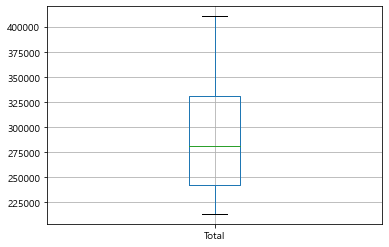

In [14]:
result.boxplot(column=['Total'])